In [87]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np


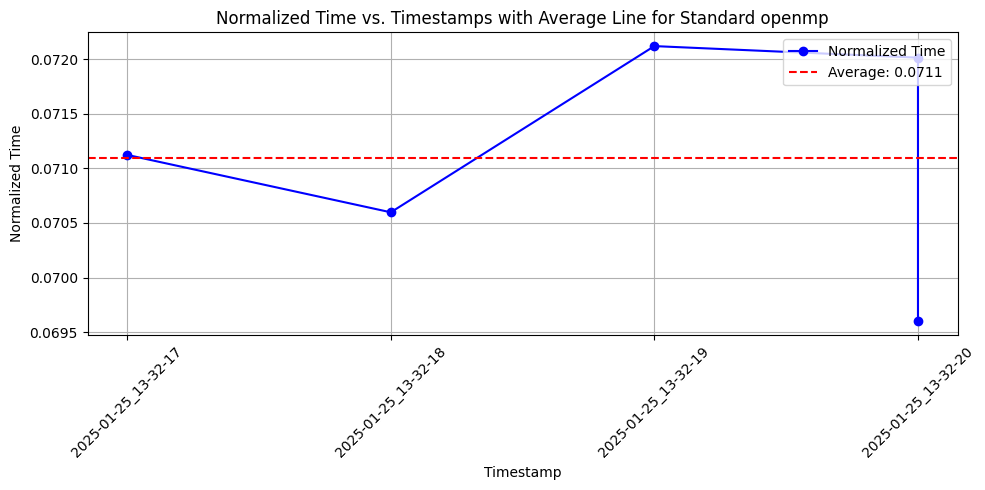

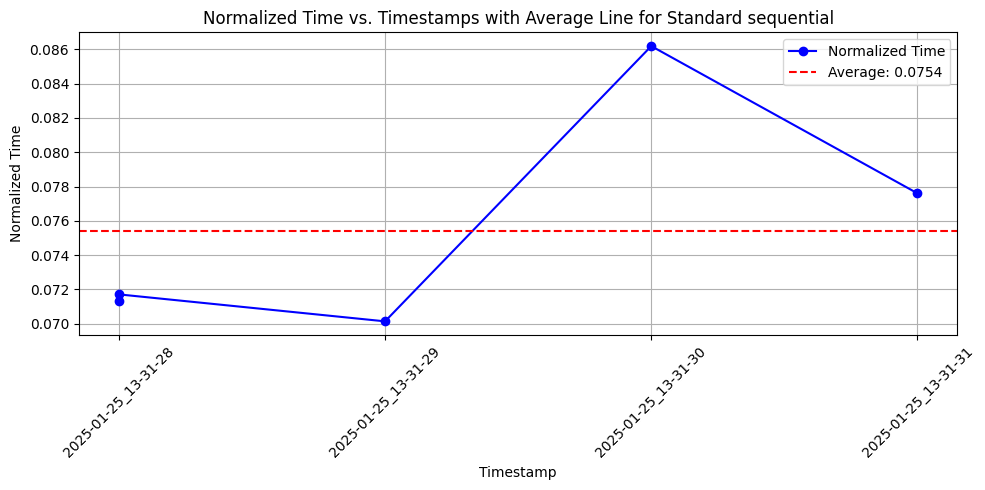

In [96]:
# List of files to compare
size="standard"
files = [
    f"./openmp/{size}_openmp.json",
    f"./sequential/{size}_sequential.json",
]


# load the data and calculate the average
def load_data_and_create_plot(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    # Extract timestamps and normalized times
    timestamps = [list(item.keys())[0].split('=')[1] for item in data]
    normalized_times = [item[list(item.keys())[0]]['Normalized-time'] for item in data]

    # Calculate the average normalized time
    avg_normalized_time = np.mean(normalized_times)

    # Create plot
    plt.figure(figsize=(10, 5))
    plt.plot(timestamps, normalized_times, marker='o', linestyle='-', color='b', label="Normalized Time")
    plt.axhline(y=avg_normalized_time, color='r', linestyle='--', label=f"Average: {avg_normalized_time:.4f}")
    plt.xticks(rotation=45)
    plt.title(f"Normalized Time vs. Timestamps with Average Line for {os.path.basename(filename).split('.')[0].replace('_', ' ').capitalize()}")
    plt.xlabel("Timestamp")
    plt.ylabel("Normalized Time")
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.tight_layout()

    # Show the plot
    plt.show()
    # plot_filename = f"{os.path.basename(filename).split('.')[0]}_plot.png"
    # plt.savefig(plot_filename)
    plt.close()

# Loop through each file and create the plot
for file in files:
    load_data_and_create_plot(file)


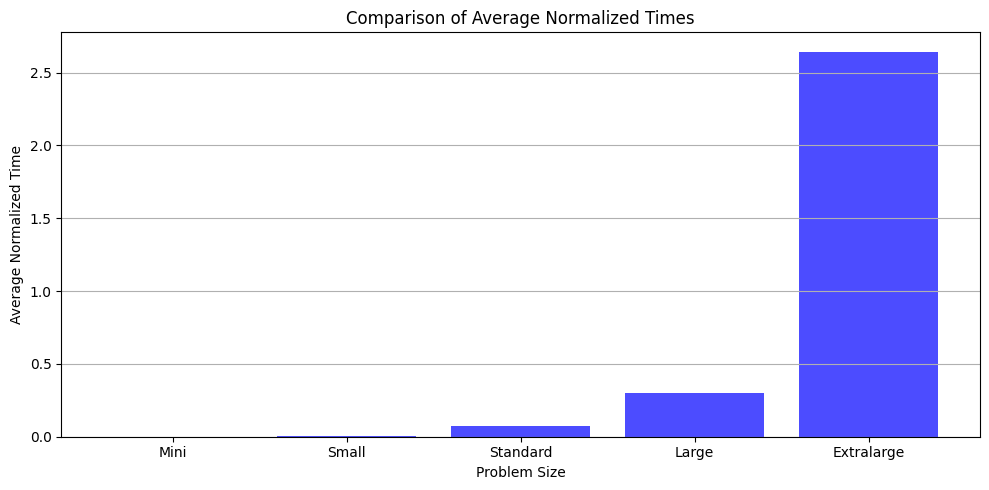

In [100]:
# load the data from a file and calculate the average
def load_data_and_calculate_avg(filename):
    with open(filename, 'r') as file:
        data = json.load(file)

    # Extract normalized times
    normalized_times = [item[list(item.keys())[0]]['Normalized-time'] for item in data]

    # Calculate the average normalized time
    avg_normalized_time = np.mean(normalized_times)
    return avg_normalized_time


# List of files to compare
type_run="sequential"
files = [
    f"./{type_run}/mini_{type_run}.json", 
    f"./{type_run}/small_{type_run}.json", 
    f"./{type_run}/standard_{type_run}.json", 
    f"./{type_run}/large_{type_run}.json",
    f"./{type_run}/extralarge_{type_run}.json"
] 

# Extract averages and filenames
averages = []
file_names = []

for file in files:
    avg = load_data_and_calculate_avg(file)
    averages.append(avg)
    file_names.append(os.path.basename(file).split('.')[0].split('_')[0].capitalize())  # Get just the file name

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(file_names, averages, color='b', alpha=0.7)
plt.xlabel("Problem Size")
plt.ylabel("Average Normalized Time")
plt.title("Comparison of Average Normalized Times")
plt.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


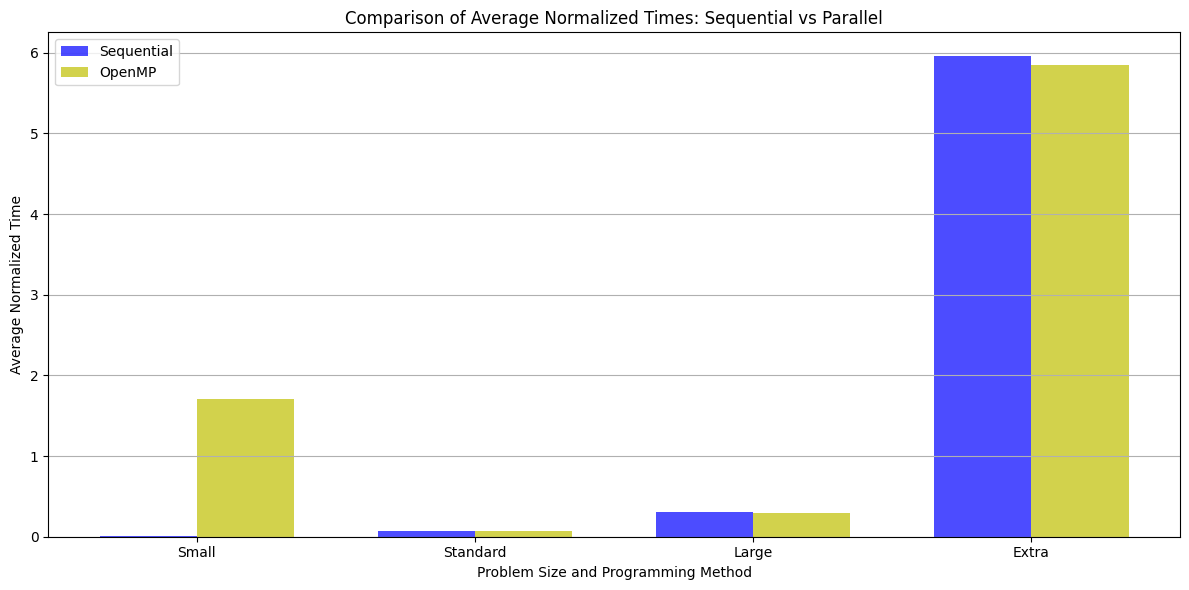

In [94]:
# Function to load data and calculate average
def load_data_and_calculate_avg(filename):
    with open(filename, 'r') as file:
        data = json.load(file)

    # Extract normalized times
    normalized_times = [item[list(item.keys())[0]]['Normalized-time'] for item in data]

    # Calculate the average normalized time
    avg_normalized_time = np.mean(normalized_times)
    return avg_normalized_time


# List 1 of files (e.g. sequential)
files_list_1 = [
    "./sequential/small_sequential.json",
    "./sequential/standard_sequential.json", 
    "./sequential/large_sequential.json",
    "./sequential/extra_large_sequential.json"
]

# List 2 of files (e.g openmp)
files_list_2 = [
    "./openmp/small_openmp.json",
    "./openmp/standard_openmp.json", 
    "./openmp/large_openmp.json",
    "./openmp/extra_large_openmp.json"
]

# Ensure both lists have the same number of files
assert len(files_list_1) == len(files_list_2), "Both lists must have the same number of files!"

# Extract averages and filenames 
averages_1 = []
for file in files_list_1:
    avg = load_data_and_calculate_avg(file)
    averages_1.append(avg)

# Extract averages and filenames
averages_2 = []
sizes = []
for file in files_list_2:
    avg = load_data_and_calculate_avg(file)
    averages_2.append(avg)
    sizes.append(os.path.basename(file).split('.')[0].split('_')[0].capitalize()) 

# Create the plot with bars for both lists (one in blue, the other in yellow)
x = np.arange(len(files_list_1))  # Set the x position for the bars
width = 0.35  # Bar width

plt.figure(figsize=(12, 6))

# Plot for list 1
plt.bar(x - width/2, averages_1, width, color='b', alpha=0.7, label='List 1')

# Plot for list 2
plt.bar(x + width/2, averages_2, width, color='y', alpha=0.7, label='List 2')

# Labels and title
plt.xlabel("Problem Size and Programming Method")
plt.ylabel("Average Normalized Time")
plt.title("Comparison of Average Normalized Times: Sequential vs Parallel")
plt.xticks(x,sizes) 
plt.legend(['Sequential', 'OpenMP'])

plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

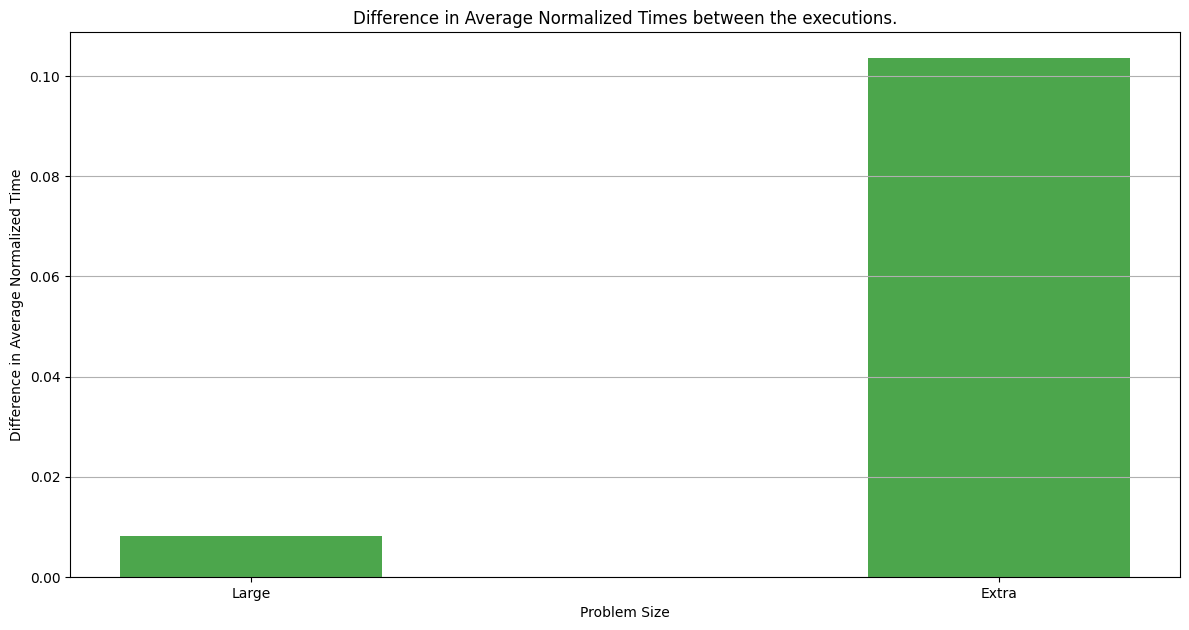

In [95]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to load data and calculate average
def load_data_and_calculate_avg(filename):
    with open(filename, 'r') as file:
        data = json.load(file)

    # Extract normalized times
    normalized_times = [item[list(item.keys())[0]]['Normalized-time'] for item in data]

    # Calculate the average normalized time
    avg_normalized_time = np.mean(normalized_times)
    return avg_normalized_time


# List 1 of files (e.g. sequential)
files_list_1 = [
    "./sequential/large_sequential.json",
    "./sequential/extra_large_sequential.json"
]

# List 2 of files (e.g openmp)
files_list_2 = [
    "./openmp/large_openmp.json",
    "./openmp/extra_large_openmp.json"
]

# Ensure both lists have the same number of files
assert len(files_list_1) == len(files_list_2), "Both lists must have the same number of files!"

# Extract averages for list 1
averages_1 = []
for file in files_list_1:
    avg = load_data_and_calculate_avg(file)
    averages_1.append(avg)

# Extract averages for list 2
averages_2 = []
sizes = []
for file in files_list_2:
    avg = load_data_and_calculate_avg(file)
    averages_2.append(avg)
    sizes.append(os.path.basename(file).split('.')[0].split('_')[0].capitalize()) 

# Calculate the difference between the two sets of averages (positive and negative)
differences = np.array(averages_1) - np.array(averages_2)

# Create the plot with bars for both lists (one in blue, the other in yellow)
x = np.arange(len(files_list_1))  # Set the x position for the bars
width = 0.35  # Bar width

plt.figure(figsize=(12, 12))

# Plot for the differences between the two sets (positive and negative)
plt.subplot(2, 1, 2)  # Create the second subplot for the difference
# Color differences: red for negative, green for positive
colors = ['r' if diff < 0 else 'g' for diff in differences]
plt.bar(x, differences, width, color=colors, alpha=0.7, label='Difference')
plt.xlabel("Problem Size")
plt.ylabel("Difference in Average Normalized Time")
plt.title("Difference in Average Normalized Times between the executions.")
plt.xticks(x, sizes)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()
